In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [163]:
#Data Preprocessing

In [186]:
df = pd.read_csv("C:\\Users\\ritan\\Dropbox\\PC\\Downloads\\UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [187]:
print(df.shape)
df.dtypes

(1156, 7)


START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [188]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [189]:
df[df['END_DATE'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [191]:
df.drop(df[df['END_DATE'].isnull()].index,axis= 0, inplace = True)

In [192]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [193]:
df.drop(['PURPOSE'], axis = 1, inplace = True)


In [194]:
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0


In [195]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [196]:
df.drop(df[df.duplicated()].index, axis = 0, inplace = True)

In [197]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES


In [198]:
from datetime import datetime

df['START_DATE'] = pd.to_datetime(df['START_DATE'],) #format ='%m/%d/%Y %H:%M' or '%m-%d-%Y %H:%M'
df['END_DATE'] = pd.to_datetime(df['END_DATE']) #format = '%m/%d/%Y %H:%M' or '%m-%d-%Y %H:%M'



In [199]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
dtype: object

In [200]:
#Univariate Analysis

In [201]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [202]:
df[['CATEGORY', 'MILES']].groupby(['CATEGORY']).agg(total_miles = ('MILES', 'sum'))

,total_miles
CATEGORY,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Miles in a category')

<Figure size 432x288 with 0 Axes>

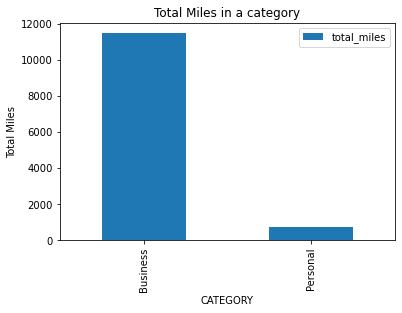

In [203]:
plt.figure()

df[['CATEGORY', 'MILES']].groupby(['CATEGORY']).agg(total_miles = ('MILES', 'sum')).plot(kind = 'bar')

plt.xlabel("CATEGORY")
plt.ylabel("Total Miles")
plt.title("Total Miles in a category")




<AxesSubplot:>

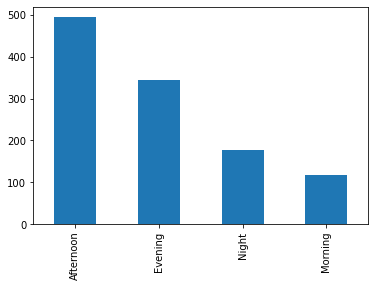

In [204]:
#Count of uber rides in different times of the day
df['START_TIME'] = pd.DatetimeIndex(df['START_DATE']).hour


df['DAY_NIGHT'] = pd.cut(x = df['START_TIME'],
                         bins = [0,9,15,19,24],
                         labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

df['DAY_NIGHT'].value_counts(ascending = False).plot(kind = 'bar')


In [183]:
#Unique Start Locations
len(df['START'].unique())

177

In [95]:
#Count of top 10 start locations(in count)
df['START'].value_counts(ascending = False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

Text(0.5, 1.0, 'Pickup Counts for each locations')

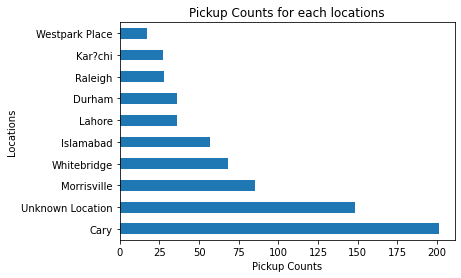

In [98]:
#Plotting
df['START'].value_counts(ascending = False)[:10].plot(kind = 'barh')
plt.xlabel("Pickup Counts")
plt.ylabel("Locations")
plt.title("Pickup Counts for each locations")

In [99]:
#Unique Stop Locations
len(df['STOP'].unique())

188

In [100]:
#Top 10 stop locations (with Count)
df['STOP'].value_counts(ascending = False)[:10]

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

Text(0.5, 1.0, 'Stop Count for each Location')

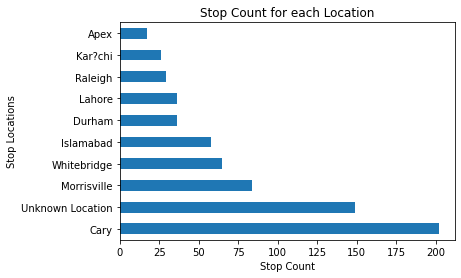

In [101]:
df['STOP'].value_counts(ascending = False)[0:10].plot(kind = 'barh')
plt.xlabel("Stop Count")
plt.ylabel("Stop Locations")
plt.title("Stop Count for each Location")

<AxesSubplot:xlabel='MILES', ylabel='Count'>

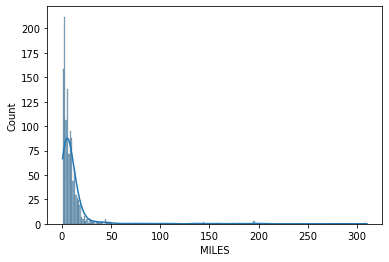

In [103]:
sns.histplot(df['MILES'], kde = True)

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


In [111]:
#Multivariate Analysis
df.groupby(['START','STOP'])['MILES'].apply(print)

910    2.2
Name: (Agnew, Agnew), dtype: float64
906    4.3
Name: (Agnew, Cory), dtype: float64
908    2.2
911    2.4
Name: (Agnew, Renaissance), dtype: float64
879    15.2
Name: (Almond, Bryson City), dtype: float64
646    1.0
825    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
565     5.5
616     4.6
647     6.0
826     5.3
978     5.4
1014    5.3
1033    8.8
1045    4.7
Name: (Apex, Cary), dtype: float64
855    2.2
Name: (Apex, Eagle Rock), dtype: float64
1001    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
621    4.9
Name: (Arlington, Washington), dtype: float64
613    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
881    195.9
Name: (Asheville, Mebane), dtype: float64
871    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
547     8.3
548     3.2
551     4.5
556    13.0
557     4.4
Name: (Banne

START          STOP              
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES, Length: 363, dtype: object

In [118]:
df.groupby(['START','STOP'])['MILES'].sum()[1:11]

START                      STOP                     
Agnew                      Cory                          4.3
                           Renaissance                   4.6
Almond                     Bryson City                  15.2
Apex                       Apex                          4.3
                           Cary                         75.3
                           Eagle Rock                    2.2
                           Holly Springs                 9.0
Arabi                      Metairie                     17.0
Arlington                  Washington                    4.9
Arlington Park at Amberly  Lexington Park at Amberly     1.3
Name: MILES, dtype: float64

<AxesSubplot:xlabel='ROUNDTRIP', ylabel='count'>

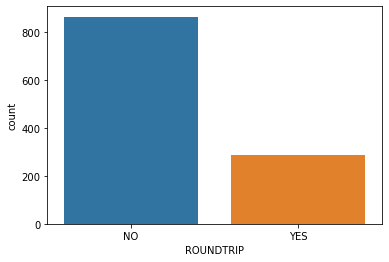

In [124]:
def is_roundtrip(df):
    if df['START'] == df['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUNDTRIP'] = df.apply(is_roundtrip, axis = 1)

sns.countplot(x = 'ROUNDTRIP',data = df, order = df['ROUNDTRIP'].value_counts().index)

    

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,ROUNDTRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,NO
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NO
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,NO
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,NO
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,NO
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,NO
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,NO
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,NO
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,NO


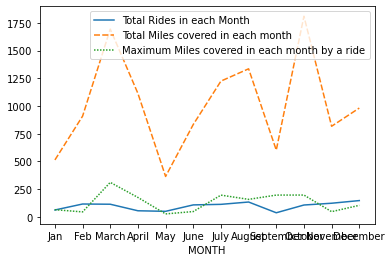

In [206]:
#Analysing and Visualising the Month Data

df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

month_label = {1.0:'Jan', 2.0:'Feb', 3.0:'March', 4.0:'April', 5.0:'May', 6.0:'June', 7.0:'July', 8.0:'August',
               9.0:'September',10.0:'October',11.0:'November',12.0:'December'}

df['MONTH'] = df['MONTH'].map(month_label)

mon = df['MONTH'].value_counts(sort = False)

df = pd.DataFrame({"Total Rides in each Month": mon.values,
                   "Total Miles covered in each month": df.groupby('MONTH', sort = False)['MILES'].sum(),
                   "Maximum Miles covered in each month by a ride": df.groupby('MONTH', sort = False)['MILES'].max()
                   })

p = sns.lineplot(data = df)
